## Northwind Database Analysis 
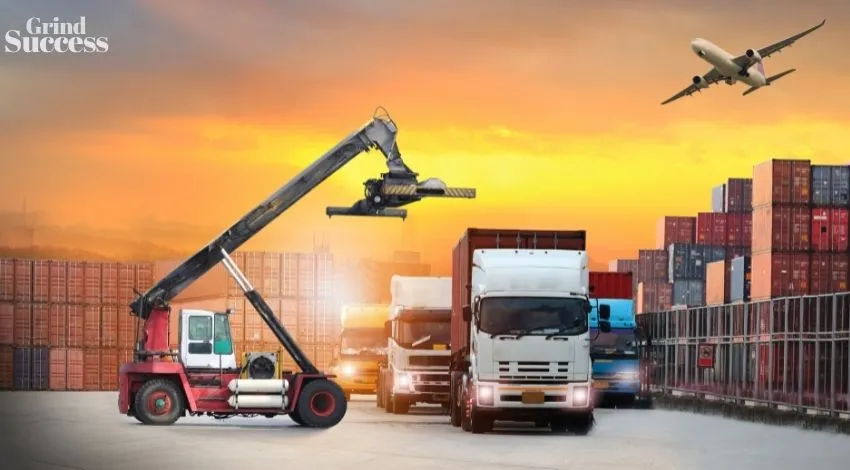

The Northwind database is a sample database that was originally created by Microsoft and contains the sales data for a fictitious company called “Northwind Traders,” which imports and exports specialty foods from around the world. The Northwind database is an excellent tutorial schema for a small-business ERP, with customers, orders, inventory, purchasing, suppliers, shipping, employees, and single-entry accounting.

The Northwind dataset includes sample data for the following.

* Suppliers: Suppliers and vendors of Northwind
* Customers: Customers who buy products from Northwind
* Employees: Employee details of Northwind traders
* Products: Product information
* Shippers: The details of the shippers who ship the products from the traders to the end-customers
* Orders and Order_Details: Sales Order transactions taking place between the customers & the company

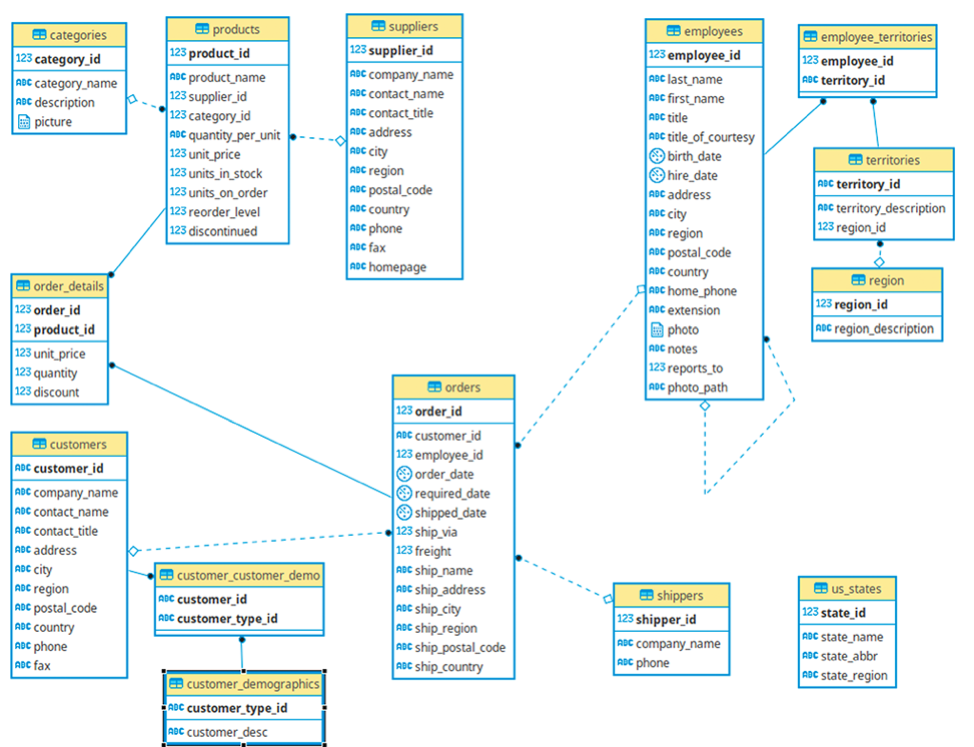

We will use this database , to answer the following questions : 
* 1. Which Food Category has the most Products ? 
* 2. Which Food Category has  most units on order ?
* 3. What are the top 10 products with high price?
* 4. what are the top 10 products with low price ?
* 5. To which category belongs the products with higher price?
* 6. To which category belongs the products with lower price?
* 7. What are the top 10 products with higher numbers of units in stock ? to which category do they belong?
* 8. What are the top 10 products with lower number of units in stock ? to which category do they belong?
* 9. What is the total number of units in Stock per category?
* 10. Which products should be ordered immediately ? : Assessing the urgence of reordering products
* 11. What are the top 20 orders in terms of revenues ?
* 12. What are the top 10 most sold products ? to which category do they belong?
* 13. What are the top 10 most sold products ? to which category do they belong?
* 14. What are the total sales per category ?
* 15. What are the Total sales per year ?
* 16. What are the top 10 products with most sales in 1996?
* 17. What are the categories with most sales in 1996
* 18. What are the top 10 countries with most sales ?
* 19. What are the top 10 customers in terms of sales?
* 20. What are the top 10 customers in terms of orders ?
* 21. How many orders do we have per country ?
* 22. How many clients do we have per country?
* 23. What are the total sales per employee?
* 24. What are the top 10 employees in terms of orders?
* 25. What is the number of employees per title ? how many sales representative , etc.. do we have ?


In [4]:
# Loading the libraries 
library(RODBC)
library(odbc)
library(readr)
library(ggplot2)
library(data.table)
library(dplyr)
library(corrplot)

Warning message:
"package 'odbc' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'data.table' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

corrplot 0.92 loaded


In [5]:
# loading the SQL Connection
conn <- odbcConnect("connections")
conn

RODBC Connection 1
Details:
  case=nochange
  DSN=connections
  UID=
  Trusted_Connection=Yes
  WSID=AICHA
  DATABASE=NORTHWND

### 1. Which Food Category has the most Products ?

In [6]:
## WHAT is the category with most products
products_per_category <- sqlQuery(conn,"SELECT CAT.CategoryName, Count(PROD.ProductID) As 'Number of Products'  FROM Categories CAT 
INNER JOIN Products PROD ON CAT.CategoryID = PROD.CategoryID
GROUP BY CAT.CategoryName
ORDER BY [Number of Products] DESC")
products_per_category

CategoryName,Number of Products
Confections,13
Beverages,12
Condiments,12
Seafood,12
Dairy Products,10
Grains/Cereals,7
Meat/Poultry,6
Produce,5


##### The Food catgeory with most products is Confections , followed by: Beverages, Condiments , Seafood with 12 products.

### 2. Which Food Category has most units on order ?

In [7]:
# Which Category has the most units on order
unitsonorder_per_category <- sqlQuery(conn,"SELECT Count(PROD.ProductID) AS 'Number of products' ,sum(PROD.UnitsOnOrder) AS 'Total of units on order',CAT.CategoryName FROM 
Products PROD INNER JOIN Categories CAT ON PROD.CategoryID = CAT.CategoryID
GROUP BY CAT.CategoryName
ORDER BY [Total of units on order] DESC , [Number of products] DESC;")
unitsonorder_per_category

Number of products,Total of units on order,CategoryName
13,180,Confections
12,170,Condiments
10,140,Dairy Products
12,120,Seafood
7,90,Grains/Cereals
12,60,Beverages
5,20,Produce
6,0,Meat/Poultry


### 3. What are the top 10 products with high price?

In [8]:
## Top 10 products with higher price 
top10_high_price <- sqlQuery(conn,"SELECT TOP 10 * FROM Products 
ORDER BY UnitPrice DESC")
top10_high_price

ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
38,Côte de Blaye,18,1,12 - 75 cl bottles,263.50,17,0,15,0
29,Thüringer Rostbratwurst,12,6,50 bags x 30 sausgs.,123.79,0,0,0,1
9,Mishi Kobe Niku,4,6,18 - 500 g pkgs.,97.00,29,0,0,1
20,Sir Rodney's Marmalade,8,3,30 gift boxes,81.00,40,0,0,0
18,Carnarvon Tigers,7,8,16 kg pkg.,62.50,42,0,0,0
59,Raclette Courdavault,28,4,5 kg pkg.,55.00,79,0,0,0
51,Manjimup Dried Apples,24,7,50 - 300 g pkgs.,53.00,20,0,10,0
62,Tarte au sucre,29,3,48 pies,49.30,17,0,0,0
43,Ipoh Coffee,20,1,16 - 500 g tins,46.00,17,10,25,0
28,Rössle Sauerkraut,12,7,25 - 825 g cans,45.60,26,0,0,1


### 4. What are the top 10 products with low price?

In [9]:
## Top 10 products with low price 
top10_low_price <- sqlQuery(conn,"SELECT TOP 10 * FROM Products 
ORDER BY UnitPrice")
top10_low_price

ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
33,Geitost,15,4,500 g,2.50,112,0,20,0
24,Guaraná Fantástica,10,1,12 - 355 ml cans,4.50,20,0,0,1
13,Konbu,6,8,2 kg box,6.00,24,0,5,0
52,Filo Mix,24,5,16 - 2 kg boxes,7.00,38,0,25,0
54,Tourtière,25,6,16 pies,7.45,21,0,10,0
75,Rhönbräu Klosterbier,12,1,24 - 0.5 l bottles,7.75,125,0,25,0
23,Tunnbröd,9,5,12 - 250 g pkgs.,9.00,61,0,25,0
19,Teatime Chocolate Biscuits,8,3,10 boxes x 12 pieces,9.20,25,0,5,0
45,Rogede sild,21,8,1k pkg.,9.50,5,70,15,0
47,Zaanse koeken,22,3,10 - 4 oz boxes,9.50,36,0,0,0


### 5.To which category belongs the products with higher price?

In [10]:
## category with high prices
top10_highprice_category <- sqlQuery(conn,"SELECT TOP (10) PROD.ProductID,PROD.ProductName,PROD.UnitPrice,CAT.CategoryName
FROM Products PROD INNER JOIN Categories CAT ON PROD.CategoryID = CAT.CategoryID
ORDER BY UnitPrice DESC")
top10_highprice_category

ProductID,ProductName,UnitPrice,CategoryName
38,Côte de Blaye,263.50,Beverages
29,Thüringer Rostbratwurst,123.79,Meat/Poultry
9,Mishi Kobe Niku,97.00,Meat/Poultry
20,Sir Rodney's Marmalade,81.00,Confections
18,Carnarvon Tigers,62.50,Seafood
59,Raclette Courdavault,55.00,Dairy Products
51,Manjimup Dried Apples,53.00,Produce
62,Tarte au sucre,49.30,Confections
43,Ipoh Coffee,46.00,Beverages
28,Rössle Sauerkraut,45.60,Produce


##### The most expensive product belongs to the Beverages Category , followed by products from Meat/Poultry Category.
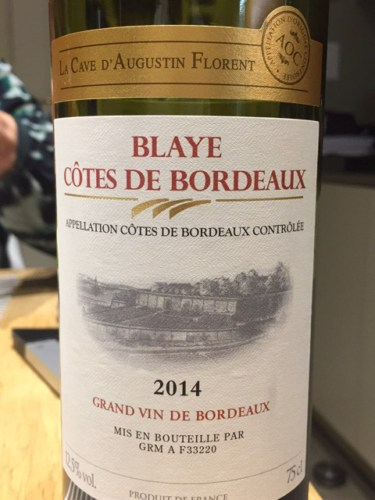

### 6.To which category belongs the products with lower price?

In [11]:
## category with low prices
top10_lowprice_category <- sqlQuery(conn,"SELECT TOP (10) PROD.ProductID,PROD.ProductName,PROD.UnitPrice,CAT.CategoryName
FROM Products PROD INNER JOIN Categories CAT ON PROD.CategoryID = CAT.CategoryID
ORDER BY UnitPrice ASC")
top10_lowprice_category

ProductID,ProductName,UnitPrice,CategoryName
33,Geitost,2.50,Dairy Products
24,Guaraná Fantástica,4.50,Beverages
13,Konbu,6.00,Seafood
52,Filo Mix,7.00,Grains/Cereals
54,Tourtière,7.45,Meat/Poultry
75,Rhönbräu Klosterbier,7.75,Beverages
23,Tunnbröd,9.00,Grains/Cereals
19,Teatime Chocolate Biscuits,9.20,Confections
47,Zaanse koeken,9.50,Confections
45,Rogede sild,9.50,Seafood


#### The product with lowest price is Geitost , from the dairy products category.
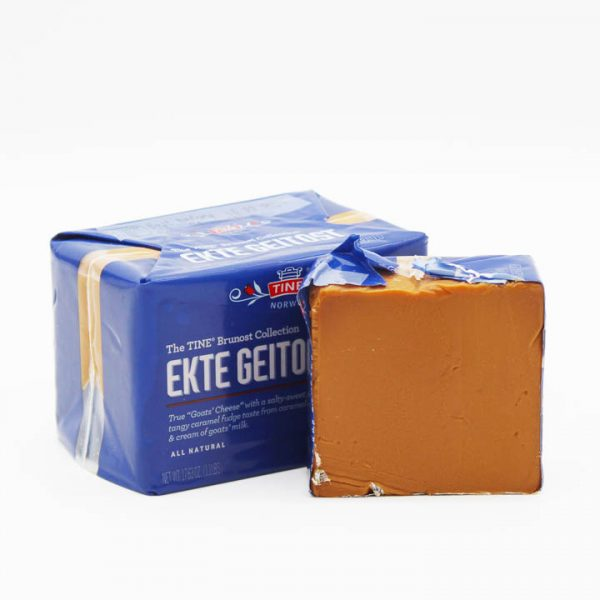

### 7. What are the top 10 products with higher numbers of units in stock ? to which category do they belong

In [12]:
## Top 10 products with higher number of units in stock vs category
top10_high_unitsinstock <- sqlQuery(conn,"SELECT TOP (10) PROD.ProductID,PROD.ProductName,PROD.UnitsInStock,CAT.CategoryName
FROM Products PROD INNER JOIN Categories CAT ON PROD.CategoryID = CAT.CategoryID
ORDER BY UnitsInStock DESC")
top10_high_unitsinstock

ProductID,ProductName,UnitsInStock,CategoryName
75,Rhönbräu Klosterbier,125,Beverages
40,Boston Crab Meat,123,Seafood
6,Grandma's Boysenberry Spread,120,Condiments
55,Pâté chinois,115,Meat/Poultry
61,Sirop d'érable,113,Condiments
33,Geitost,112,Dairy Products
36,Inlagd Sill,112,Seafood
34,Sasquatch Ale,111,Beverages
22,Gustaf's Knäckebröd,104,Grains/Cereals
73,Röd Kaviar,101,Seafood


### 8. What are the top 10 products with lower numbers of units in stock ? to which category do they belong

In [13]:
## Top 10 products with lower number of units in stock vs category
top10_low_unitsinstock <- sqlQuery(conn,"SELECT TOP (10) PROD.ProductID,PROD.ProductName,PROD.UnitsInStock,CAT.CategoryName
FROM Products PROD INNER JOIN Categories CAT ON PROD.CategoryID = CAT.CategoryID
ORDER BY UnitsInStock")
top10_low_unitsinstock

ProductID,ProductName,UnitsInStock,CategoryName
5,Chef Anton's Gumbo Mix,0,Condiments
17,Alice Mutton,0,Meat/Poultry
29,Thüringer Rostbratwurst,0,Meat/Poultry
31,Gorgonzola Telino,0,Dairy Products
53,Perth Pasties,0,Meat/Poultry
21,Sir Rodney's Scones,3,Confections
66,Louisiana Hot Spiced Okra,4,Condiments
74,Longlife Tofu,4,Produce
45,Rogede sild,5,Seafood
68,Scottish Longbreads,6,Confections


##### The top 5 products should be reordered immediately , since there are no units in stock..

### 9. What is the total number of units in Stock  per category

In [14]:
# Total units in stock per category 
category_unitsinstock <- sqlQuery(conn,"SELECT CAT.CategoryName, sum(PROD.UnitsInStock) AS ' Total Units in Stock'   
FROM Products PROD  INNER JOIN Categories CAT 
ON PROD.CategoryID=CAT.CategoryID 
GROUP BY CAT.CategoryName
ORDER BY [ Total Units in Stock] DESC")
category_unitsinstock

CategoryName,Total Units in Stock
Seafood,701
Beverages,559
Condiments,507
Dairy Products,393
Confections,386
Grains/Cereals,308
Meat/Poultry,165
Produce,100


##### The Food category with most units in stock is Seafood , followed by Beverages and Condiments

### 10. Which products should be ordered immediately ? : Assessing the urgence of reordering products

In [15]:
# Assessing the urgency of Reordering Products 
reordering_urgence <- sqlQuery(conn,"SELECT  ProductID , ProductName , 
CASE 
WHEN UnitsInStock - ReorderLevel > 10 THEN 'No Reorder' 
WHEN UnitsInStock - ReorderLevel BETWEEN 5 AND 10 THEN 'Reorder'
ELSE 'Reorder Immediately'
END AS Reorder_need
FROM Products
ORDER BY 3 DESC;

")
reordering_urgence

ProductID,ProductName,Reorder_need
2,Chang,Reorder Immediately
3,Aniseed Syrup,Reorder Immediately
5,Chef Anton's Gumbo Mix,Reorder Immediately
11,Queso Cabrales,Reorder Immediately
17,Alice Mutton,Reorder Immediately
21,Sir Rodney's Scones,Reorder Immediately
29,Thüringer Rostbratwurst,Reorder Immediately
30,Nord-Ost Matjeshering,Reorder Immediately
31,Gorgonzola Telino,Reorder Immediately
32,Mascarpone Fabioli,Reorder Immediately


##### we can see that around 20-30% of the products should be reordered immediately..

In [16]:
# selecting using R Products that should be ordered immediately 
setDT(reordering_urgence)
reordering_urgence[Reorder_need == "Reorder Immediately"]

ProductID,ProductName,Reorder_need
2,Chang,Reorder Immediately
3,Aniseed Syrup,Reorder Immediately
5,Chef Anton's Gumbo Mix,Reorder Immediately
11,Queso Cabrales,Reorder Immediately
17,Alice Mutton,Reorder Immediately
21,Sir Rodney's Scones,Reorder Immediately
29,Thüringer Rostbratwurst,Reorder Immediately
30,Nord-Ost Matjeshering,Reorder Immediately
31,Gorgonzola Telino,Reorder Immediately
32,Mascarpone Fabioli,Reorder Immediately


### 11. To which category belongs the products that should be ordered immediately? which category has more products ?

In [17]:
# Checking to which Category belongs the products that should be ordered immediately 
reorderprod_category <- sqlQuery(conn,"SELECT  PROD.ProductID , CAT.CategoryName
FROM Categories CAT INNER JOIN Products PROD ON PROD.CategoryID = CAT.CategoryID
WHERE PROD.ProductID IN (2,3,5,11,17,21,29,30,31,32,37,38,43,45,48,49,56,53,64,66,70,74,68)
GROUP BY CAT.CategoryName , PROD.ProductID")
reorderprod_category

ProductID,CategoryName
2,Beverages
38,Beverages
43,Beverages
70,Beverages
3,Condiments
5,Condiments
66,Condiments
21,Confections
48,Confections
49,Confections


In [18]:
# Number of products per category that should be ordered 
count_reorderprod_category <- sqlQuery(conn,"SELECT  CAT.CategoryName , Count(PROD.ProductID) AS ' Number of products ' 
FROM Categories CAT INNER JOIN Products PROD ON PROD.CategoryID = CAT.CategoryID
WHERE PROD.ProductID IN (2,3,5,11,17,21,29,30,31,32,37,38,43,45,48,49,56,53,64,66,70,74,68)
GROUP BY CAT.CategoryName
ORDER BY [ Number of products ] DESC
")
count_reorderprod_category

CategoryName,Number of products
Beverages,4
Confections,4
Dairy Products,3
Condiments,3
Meat/Poultry,3
Seafood,3
Grains/Cereals,2
Produce,1


##### The food categories with most products to be reordered immediately(no units in stock) are : Beverages & Confections.

### 12. what are the top 20 orders in terms of revenues ?

In [19]:
# Top 20 orders with most revenues 
top20_orders <- sqlQuery(conn,"SELECT TOP(20) ORD.OrderID,  ORD.ShipCountry , SUM(ORDD.UnitPrice * ORDD.Quantity) AS 'Total Revenues' FROM ORDERS ORD 
INNER JOIN [Order Details] ORDD ON ORD.OrderID = ORDD.OrderID
GROUP BY ORD.OrderID,ORD.ShipCountry
ORDER BY [Total Revenues] DESC
")
top20_orders

OrderID,ShipCountry,Total Revenues
10865,Germany,17250.00
11030,USA,16321.90
10981,Brazil,15810.00
10372,Brazil,12281.20
10424,Canada,11493.20
10817,Germany,11490.70
10889,USA,11380.00
10417,Denmark,11283.20
10897,Ireland,10835.24
10353,Austria,10741.60


### 13. what are the top 10 most sold products ? to which category do they belong?

In [20]:
# TOP 10 most sold products and to which category do they belong
top10_products <- sqlQuery(conn,"SELECT TOP(10) ORD.ProductID, PROD.ProductName, SUM(ORD.UnitPrice * ORD.Quantity) AS 'Total Sales',CAT.CategoryName
FROM [Order Details] ORD INNER JOIN Products PROD ON ORD.ProductID=PROD.ProductID
INNER JOIN Categories CAT ON CAT.CategoryID = PROD.CategoryID
GROUP BY ORD.ProductID,PROD.ProductName,CAT.CategoryName
ORDER BY  [Total Sales] DESC")
top10_products

ProductID,ProductName,Total Sales,CategoryName
38,Côte de Blaye,149984.2,Beverages
29,Thüringer Rostbratwurst,87736.4,Meat/Poultry
59,Raclette Courdavault,76296.0,Dairy Products
60,Camembert Pierrot,50286.0,Dairy Products
62,Tarte au sucre,49827.9,Confections
56,Gnocchi di nonna Alice,45121.2,Grains/Cereals
51,Manjimup Dried Apples,44742.6,Produce
17,Alice Mutton,35482.2,Meat/Poultry
18,Carnarvon Tigers,31987.5,Seafood
28,Rössle Sauerkraut,26865.6,Produce


### 14. What are the total sales per category ?

In [52]:
# Total sales per category
sales_per_category <- sqlQuery(conn,"SELECT CAT.CategoryName, SUM(ORDD.UnitPrice * ORDD.Quantity) AS 'Total Sales' 
FROM [Order Details] ORDD INNER JOIN Products PROD ON ORDD.ProductID = PROD.ProductID
INNER JOIN Categories CAT ON CAT.CategoryID = PROD.CategoryID
GROUP BY CAT.CategoryName
ORDER BY [Total Sales] DESC")
sales_per_category
names(sales_per_category)[2] <- "Totalsales"

CategoryName,Total Sales
Beverages,286527.0
Dairy Products,251330.5
Meat/Poultry,178188.8
Confections,177099.1
Seafood,141623.1
Condiments,113694.8
Produce,105268.6
Grains/Cereals,100726.8


##### The food category with most sales is beverages representing around 22% of total sales.

### 15. What are the Total sales per year ?

In [38]:
# Total sales per year 
sales_per_year <- sqlQuery(conn,"
SELECT YEAR(ORD.OrderDate) AS 'Year',SUM(ORDD.UnitPrice * ORDD.Quantity) AS 'Total Sales'
FROM Orders ORD INNER JOIN [Order Details] ORDD ON ORD.OrderID = ORDD.OrderID
GROUP BY YEAR(ORD.OrderDate)
ORDER BY [Total Sales] DESC")
sales_per_year

Year,Total Sales
1997,658388.8
1998,469771.3
1996,226298.5


#####  From 1996 to 1997 , the total sales have increased by 190% , but in 1998  the total sales have decreased by 41%

### 16. What are the top 10 products with most sales in 1996?

In [39]:
# Top 10 products with most sales in 1996
productsales_2016 <- sqlQuery(conn,"SELECT TOP (10) PROD.ProductID,PROD.ProductName, CAT.CategoryName,Sum(ORDD.UnitPrice * ORDD.Quantity) AS 'Total Sales'
FROM Orders ORD INNER JOIN [Order Details] ORDD ON ORD.OrderID = ORDD.OrderID
INNER JOIN Products PROD ON PROD.ProductID = ORDD.ProductID
INNER JOIN Categories CAT ON PROD.CategoryID = CAT.CategoryID
WHERE YEAR(ORD.OrderDate) = '1996'
GROUP BY PROD.ProductID , PROD.ProductName,CAT.CategoryName
ORDER BY [Total Sales] DESC")
productsales_2016

ProductID,ProductName,CategoryName,Total Sales
38,Côte de Blaye,Beverages,29512.0
29,Thüringer Rostbratwurst,Meat/Poultry,12177.0
59,Raclette Courdavault,Dairy Products,10164.0
60,Camembert Pierrot,Dairy Products,10064.0
62,Tarte au sucre,Confections,9850.0
17,Alice Mutton,Meat/Poultry,7300.8
72,Mozzarella di Giovanni,Dairy Products,7263.0
51,Manjimup Dried Apples,Produce,6911.2
20,Sir Rodney's Marmalade,Confections,6868.8
53,Perth Pasties,Meat/Poultry,5528.2


### 17. What are the categories with most sales in 1996

In [40]:
# Categories with most sales in 2016
categorysales_1996 <- sqlQuery(conn,"SELECT TOP (10)  CAT.CategoryName,Sum(ORDD.UnitPrice * ORDD.Quantity) AS 'Total Sales'
FROM Orders ORD INNER JOIN [Order Details] ORDD ON ORD.OrderID = ORDD.OrderID
INNER JOIN Products PROD ON PROD.ProductID = ORDD.ProductID
INNER JOIN Categories CAT ON PROD.CategoryID = CAT.CategoryID
WHERE YEAR(ORD.OrderDate) = '1996'
GROUP BY CAT.CategoryName
ORDER BY [Total Sales] DESC")
categorysales_1996

CategoryName,Total Sales
Beverages,53879.2
Dairy Products,44615.8
Confections,31511.6
Meat/Poultry,30292.2
Seafood,21589.6
Condiments,19458.3
Produce,15134.2
Grains/Cereals,9817.6


### 18. What are the top 10 countries with most sales ?

In [41]:
# TOP 10 Countries with most sales
sales_per_country <- sqlQuery(conn,"SELECT TOP(10) ORD.ShipCountry,SUM(ORDD.UnitPrice * ORDD.Quantity) AS 'Total Sales'
FROM [Order Details] ORDD  INNER JOIN Orders ORD ON ORDD.OrderID = ORD.OrderID
GROUP BY ORD.ShipCountry
ORDER BY [Total Sales] DESC")
sales_per_country

ShipCountry,Total Sales
USA,263566.98
Germany,244640.63
Austria,139496.63
Brazil,114968.48
France,85498.76
Venezuela,60814.89
UK,60616.51
Sweden,59523.70
Ireland,57317.39
Canada,55334.10


##### The top 5 countries in terms of sales are : USA , Germany , Austria , Brazil and France.

### 19. What are the top 10 customers in terms of sales?

In [42]:
# TOP 10 Customers sales
top10_customers_sales <- sqlQuery(conn,"SELECT TOP(10) CUST.CompanyName,ORD.ShipCountry,SUM(ORDD.UnitPrice * ORDD.Quantity) AS 'Total Sales'
FROM Customers CUST INNER JOIN Orders ORD ON CUST.CustomerID = ORD.CustomerID
INNER JOIN [Order Details] ORDD ON ORDD.OrderID = ORD.OrderID
GROUP BY CUST.CompanyName,ORD.ShipCountry
ORDER BY [Total Sales] DESC")
top10_customers_sales

CompanyName,ShipCountry,Total Sales
QUICK-Stop,Germany,117483.39
Save-a-lot Markets,USA,115673.39
Ernst Handel,Austria,113236.68
Hungry Owl All-Night Grocers,Ireland,57317.39
Rattlesnake Canyon Grocery,USA,52245.90
Hanari Carnes,Brazil,34101.15
Folk och fä HB,Sweden,32555.55
Mère Paillarde,Canada,32203.90
Königlich Essen,Germany,31745.75
Queen Cozinha,Brazil,30226.10


### 20. What are the top 10 customers in terms of orders ? 

In [56]:
# Top 10 customers in terms of orders
top10_customers_orders <- sqlQuery(conn,"SELECT TOP(10) CUST.CompanyName,ORD.ShipCountry,Count(ORD.OrderID) AS 'Total Orders'
FROM Customers CUST INNER JOIN Orders ORD ON CUST.CustomerID = ORD.CustomerID
INNER JOIN [Order Details] ORDD ON ORDD.OrderID = ORD.OrderID
GROUP BY CUST.CompanyName,ORD.ShipCountry
ORDER BY [Total Orders] DESC")
top10_customers_orders

CompanyName,ShipCountry,Total Orders
Save-a-lot Markets,USA,116
Ernst Handel,Austria,102
QUICK-Stop,Germany,86
Rattlesnake Canyon Grocery,USA,71
Hungry Owl All-Night Grocers,Ireland,55
Berglunds snabbköp,Sweden,52
Frankenversand,Germany,48
Folk och fä HB,Sweden,45
HILARION-Abastos,Venezuela,45
Bon app',France,44


##### Although The company QUICK-Stop from Germany has made most sales in terms of revenues. In terms of orders , Save-a-lot Markets has made most orders

### 21. How many orders do we have per country ? 

In [57]:
# which customers have made most orders , we have seen in terms of total revenues , let'see in terms of number of orders 
top10_customers_orders <- sqlQuery(conn,"SELECT TOP(10) ORD.ShipCountry, (Count(ORD.OrderID)) AS 'Total Orders' 
FROM Customers CUST INNER JOIN Orders ORD ON CUST.CustomerID = ORD.CustomerID
INNER JOIN [Order Details] ORDD ON ORDD.OrderID = ORD.OrderID
GROUP BY ORD.ShipCountry
ORDER BY [Total Orders] DESC")
top10_customers_orders

ShipCountry,Total Orders
USA,352
Germany,328
Brazil,203
France,184
UK,135
Austria,125
Venezuela,118
Sweden,97
Canada,75
Mexico,72


### 22. How many clients do we have per country?

In [45]:
# how many clients do we have per country 
clients_per_country <- sqlQuery(conn,"SELECT Country, Count(CompanyName) AS 'Total Customers'
FROM Customers
GROUP BY Country
ORDER BY [Total Customers] DESC")
clients_per_country

Country,Total Customers
USA,13
France,11
Germany,11
Brazil,9
UK,7
Spain,5
Mexico,5
Venezuela,4
Italy,3
Canada,3


### 23. What are the total sales per employee?

In [46]:
# Total sales per employee
top5_employees<- sqlQuery(conn," SELECT Emp.LastName + ' ' + Emp.FirstName AS 'Employee Name' , Sum(ORDD.UnitPrice * ORDD.Quantity) AS 'Total Sales'
FROM Employees Emp INNER JOIN Orders ORD ON Emp.EmployeeID = ORD.EmployeeID
INNER JOIN [Order Details] ORDD ON ORD.OrderID = ORDD.OrderID
GROUP BY Emp.LastName , Emp.FirstName
ORDER BY [Total Sales] DESC")
top5_employees

Employee Name,Total Sales
Peacock Margaret,250187.45
Leverling Janet,213051.30
Davolio Nancy,202143.71
Fuller Andrew,177749.26
King Robert,141295.99
Callahan Laura,133301.03
Dodsworth Anne,82964.00
Suyama Michael,78198.10
Buchanan Steven,75567.75


### 24. What are the top 10 employees in terms of orders

In [49]:
# top 10 employees who have made the most orders
orders_per_employee <- sqlQuery(conn,"SELECT TOP(10) Emp.LastName + ' ' + Emp.FirstName AS 'Employee Name' , Count(OrderID) AS 'Total orders'
FROM Employees Emp INNER JOIN Orders ORD ON Emp.EmployeeID = ORD.EmployeeID
GROUP BY Emp.LastName , Emp.FirstName
ORDER BY [Total orders] DESC ")
orders_per_employee

Employee Name,Total orders
Peacock Margaret,156
Leverling Janet,127
Davolio Nancy,123
Callahan Laura,104
Fuller Andrew,96
King Robert,72
Suyama Michael,67
Dodsworth Anne,43
Buchanan Steven,42


### 25. what is the number of employees per title ? how many sales representative , etc.. do we have ?

In [50]:
# Number of employees per title : how many sales representative etc..
employees_title <- sqlQuery(conn,"SELECT Title , Count(Title) AS ' Number of Employees'
FROM Employees 
GROUP BY Title
ORDER BY [ Number of Employees] DESC;")
employees_title

Title,Number of Employees
Sales Representative,6
"Vice President, Sales",1
Inside Sales Coordinator,1
Sales Manager,1
